In [1]:
import os
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
import horus as ho

In [2]:
from simsopt.configs import get_w7x_data

In [3]:
w7x = get_w7x_data()

In [4]:
from simsopt.field import Current

In [5]:
currents = [Current(1.109484) * 1e6 for _ in range(5)]
currents.append(Current(-0.3661) * 1e6)
currents.append(Current(-0.3661) * 1e6)

In [8]:
bs, bsh, (nfp, coils, ma, sc_fieldline) = ho.stellarator(w7x[0], currents, w7x[2], nfp=5, surface_radius=2)

In [ ]:
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [15]:
nfieldlines = 50
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]
Rs = np.linspace(6.1, 6.2, nfieldlines)
Zs = [ma.gamma()[0, 2] for _ in range(nfieldlines)]
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

<Figure size 640x480 with 0 Axes>

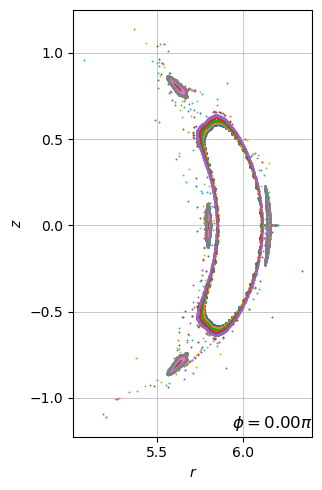

In [16]:
_, _, fig, ax = ho.poincare("simsopt", bsh, RZs, phis, sc_fieldline, tol = 1e-10)

In [18]:
import pickle
pickle.dump(fig, open("output/poincare_figure_GYM000+1750.pickle", "wb"))

In [ ]:
for col in ax.collections:
    col.set_color('black')
    col.set_sizes([0.5])

In [ ]:
fig

In [ ]:
# Directory for output
OUT_DIR = "./output/"
os.makedirs(OUT_DIR, exist_ok=True)